<a href="https://colab.research.google.com/github/ayaemad10/Arduino_Robotics/blob/main/Copy_of_unsupervised_clustering_methods_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd


meta = pd.read_excel("/kaggle/input/spacedata/Data cdm/2024_S1_cdm_ccsds00 - Copy.xlsx")
data = pd.read_excel("/kaggle/input/spacedata/Data cdm/2024_S1_cdm_ccsds00.xlsx")

# Compare columns
print("Metadata file columns:")
print(meta.columns)

print("\nData file columns:")
print(data.columns)

# Compare shapes
print("\nMetadata shape:", meta.shape)
print("Data shape:", data.shape)


Metadata file columns:
Index(['conjunction_id', 'ccsds_cdm_vers', 'comment_header', 'creation_date',
       'originator', 'comment_relative_metadata_data', 'tca', 'miss_distance',
       'relative_speed', 'relative_position_r', 'relative_position_t',
       'relative_position_n', 'relative_velocity_r', 'relative_velocity_t',
       'relative_velocity_n', 'start_screen_period', 'stop_screen_period',
       'screen_volume_shape', 'screen_volume_radius', 'collision_probability',
       'collision_probability_method', 'collision_max_probability',
       'collision_max_pc_method', 'comment_object1_metadata',
       'object1_object_designator', 'object1_catalog_name',
       'object1_object_name', 'object1_international_designator',
       'object1_object_type', 'object1_covariance_method',
       'object1_maneuverable', 'object1_orbit_center', 'object1_ref_frame',
       'object1_cov_type', 'comment_object1_od_parameters', 'object1_crdot_t',
       'object1_crdot_n', 'object1_crdot_rdot', '

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


In [ ]:

DATA_PATH = "/kaggle/input/spacedata/Data cdm/2024_S1_cdm_ccsds00.xlsx"
META_PATH = "/kaggle/input/spacedata/Data cdm/2024_S1_cdm_ccsds00 - Copy.xlsx"

# 1. load data
df = pd.read_excel(DATA_PATH)
print("data shape:", df.shape)
print(df.columns.tolist()[:40])  # preview columns

data shape: (185511, 37)
['conjunction_id', 'ccsds_cdm_vers', 'creation_date', 'tca', 'miss_distance', 'relative_speed', 'relative_position_r', 'relative_position_t', 'relative_position_n', 'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n', 'start_screen_period', 'stop_screen_period', 'screen_volume_radius', 'collision_probability', 'collision_max_probability', 'object1_object_designator', 'object1_object_name', 'object1_international_designator', 'object1_object_type', 'object1_maneuverable', 'object2_object_designator', 'object2_object_name', 'object2_international_designator', 'object2_object_type', 'object2_ephemeris_name', 'object2_maneuverable', 'object2_x', 'object2_y', 'object2_z', 'object2_x_dot', 'object2_y_dot', 'object2_z_dot', 'object2_cr_r', 'object2_ct_t', 'object2_cn_n']


using features: ['miss_distance', 'relative_speed', 'relative_position_r', 'relative_position_t', 'relative_position_n', 'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n', 'collision_probability', 'collision_max_probability']
after dropna shape: (185511, 10)
                              count         mean          std           min  \
miss_distance              185511.0   315.595593   121.299285  1.582203e+00   
relative_speed             185511.0  7414.595895  4512.002830  2.862388e-03   
relative_position_r        185511.0     0.067099   221.119126 -4.999078e+02   
relative_position_t        185511.0     0.712483   205.662092 -4.996839e+02   
relative_position_n        185511.0     0.727559   152.062574 -4.979384e+02   
relative_velocity_r        185511.0    -0.236304    89.894022 -7.639367e+03   
relative_velocity_t        185511.0 -5008.390666  4978.863700 -1.651093e+04   
relative_velocity_n        185511.0    32.925104  5045.030931 -9.843461e+03   
collision_pr

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

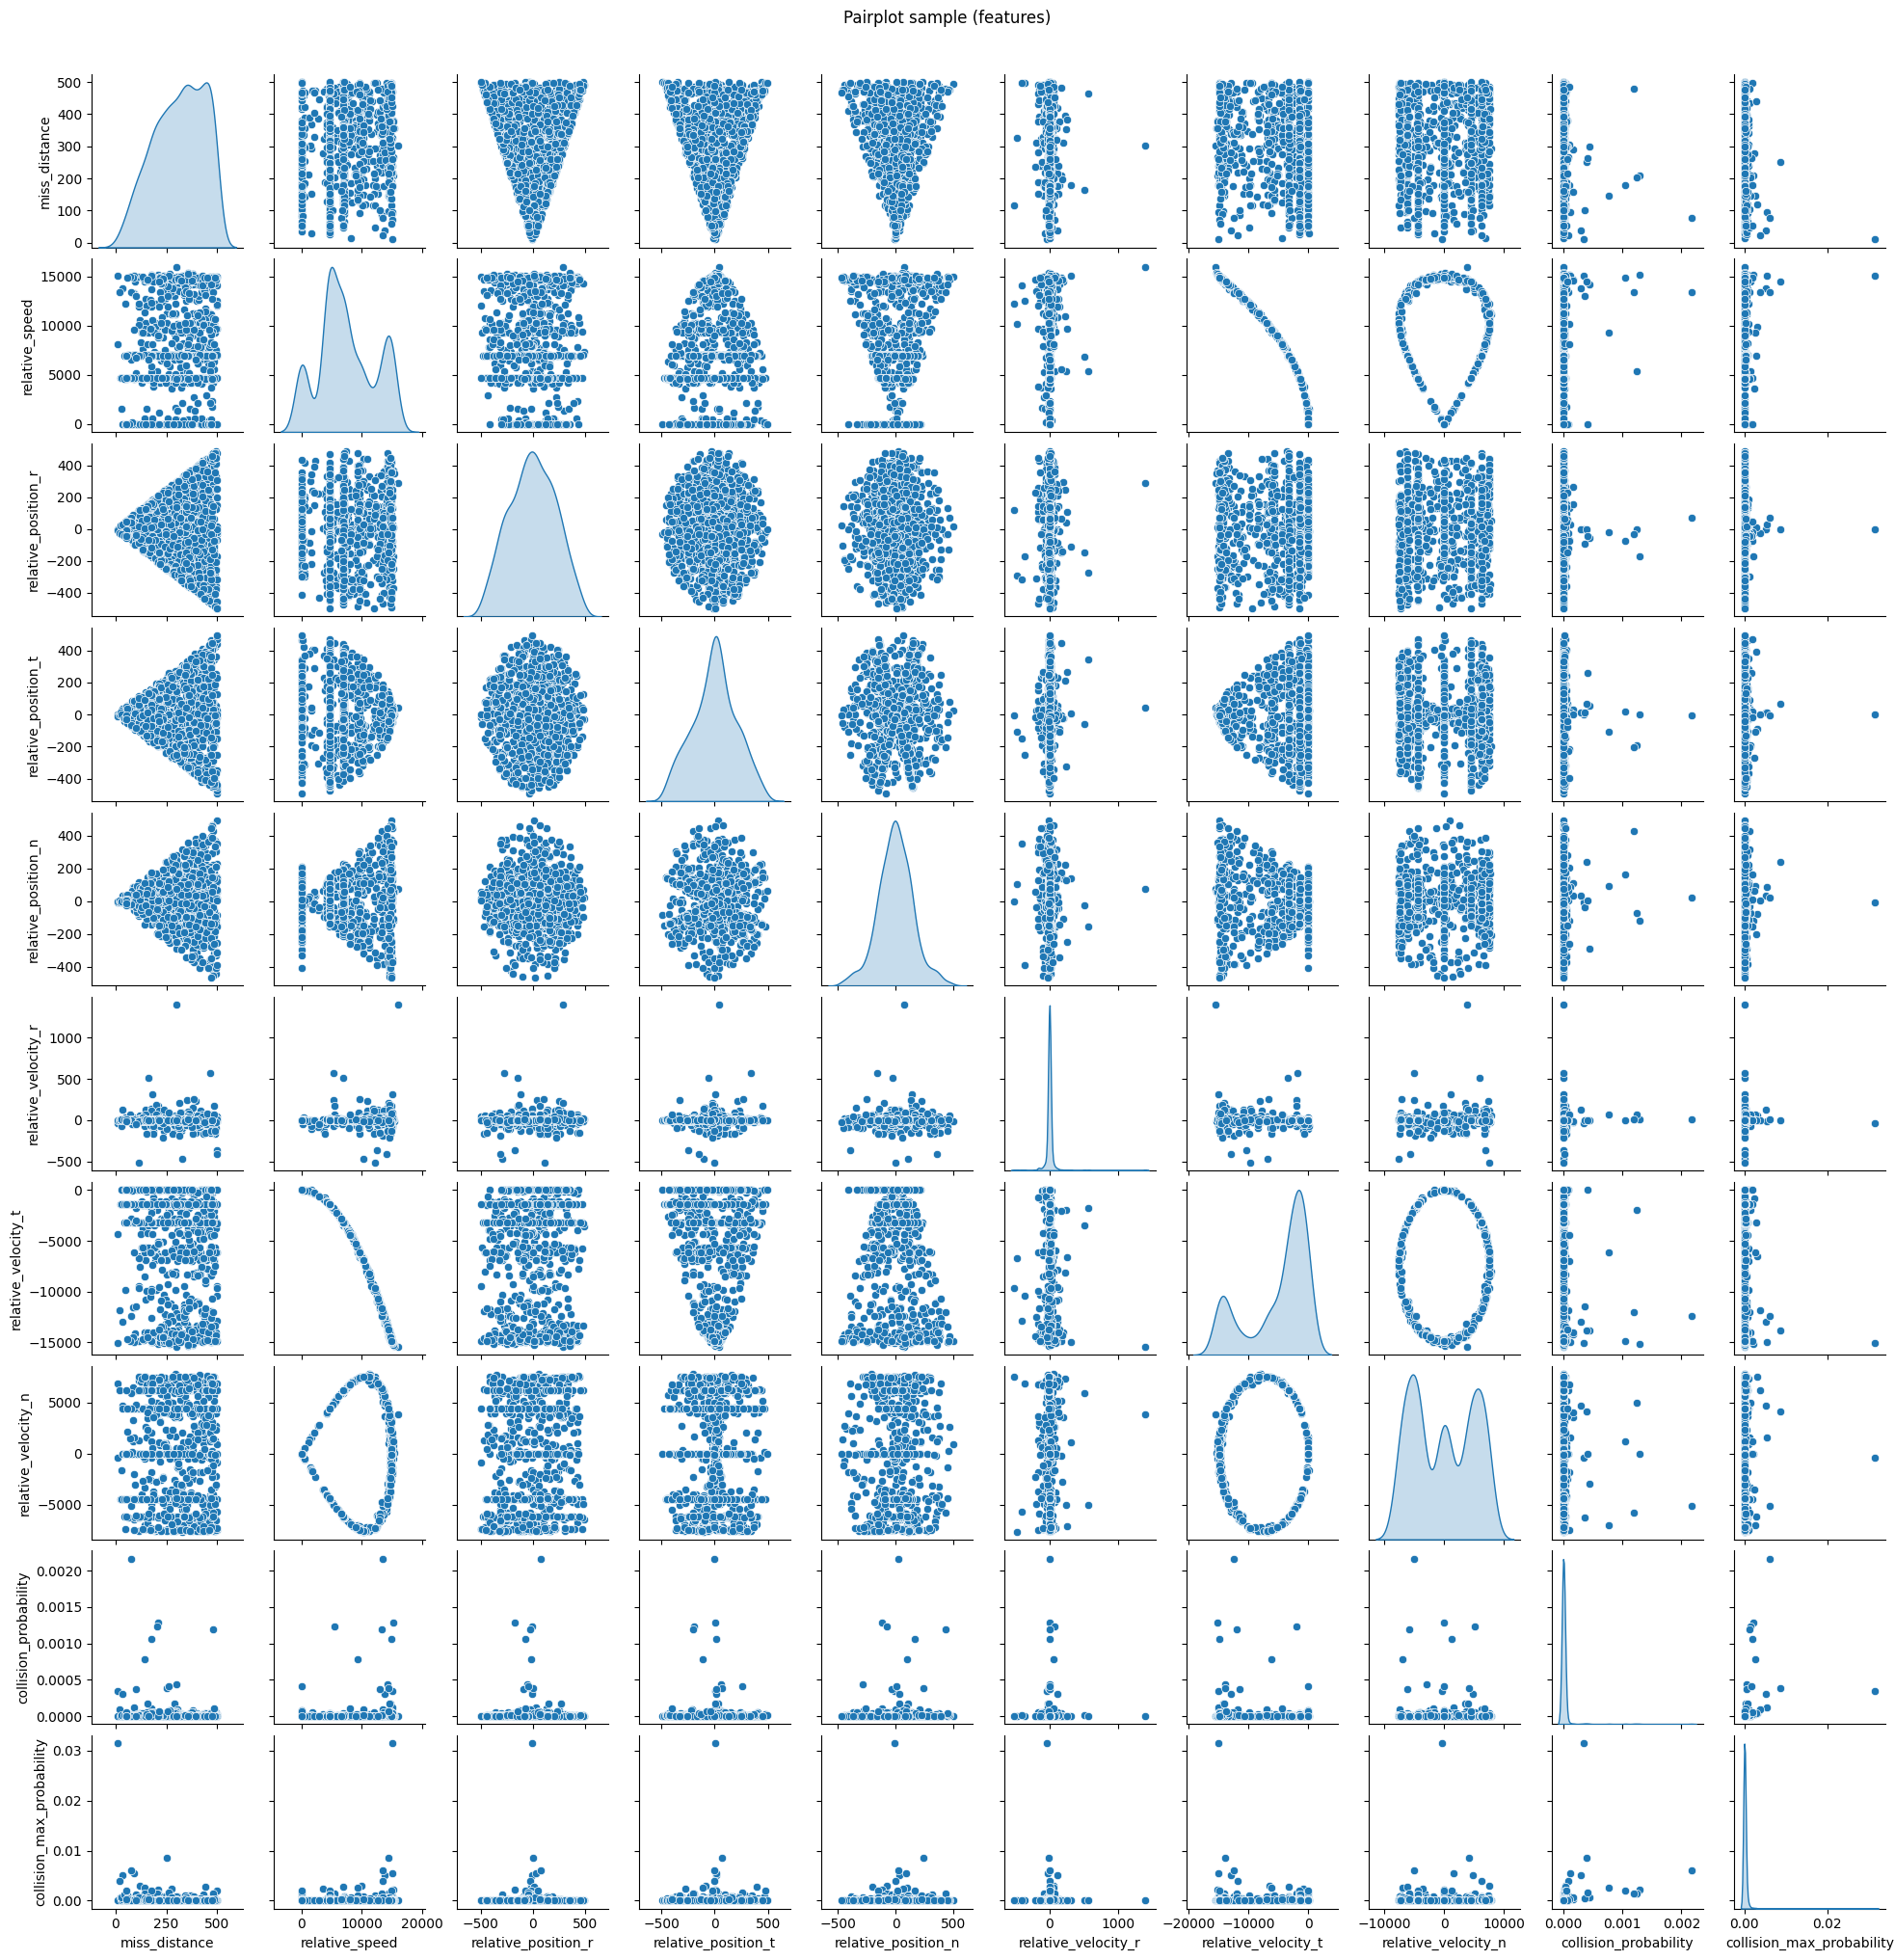

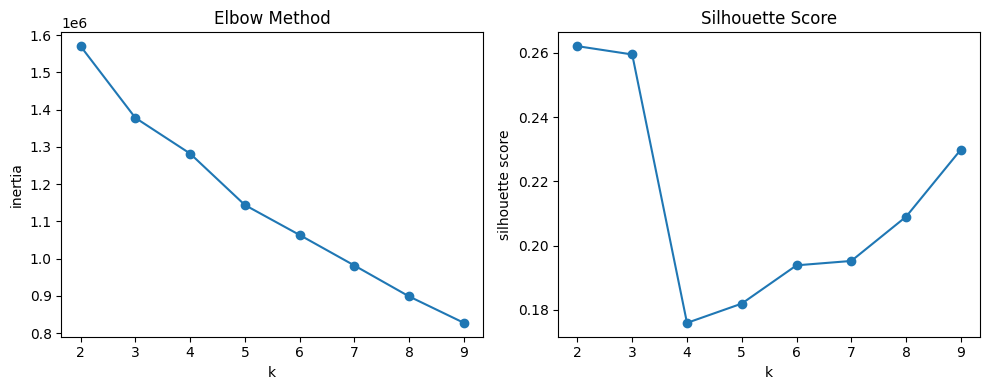

         miss_distance                     relative_speed              \
                 count      mean       std          count        mean   
kcluster                                                                
0                51643  370.0033   84.8722          51643   5504.8680   
1                86557  278.2320  127.8484          86557   5071.5373   
2                47307  324.5852  118.5572          47307  13786.1484   
3                    4   74.3020  121.6757              4  10707.4182   

                    relative_position_r                     \
                std               count     mean       std   
kcluster                                                     
0         2738.0084               51643  -3.0864  239.5356   
1         2890.6756               86557   2.4844  198.6952   
2         1316.8963               47307  -0.9167  238.4119   
3         6103.0646                   4  38.7306   78.7792   

         relative_position_t  ... relative_velocity_t

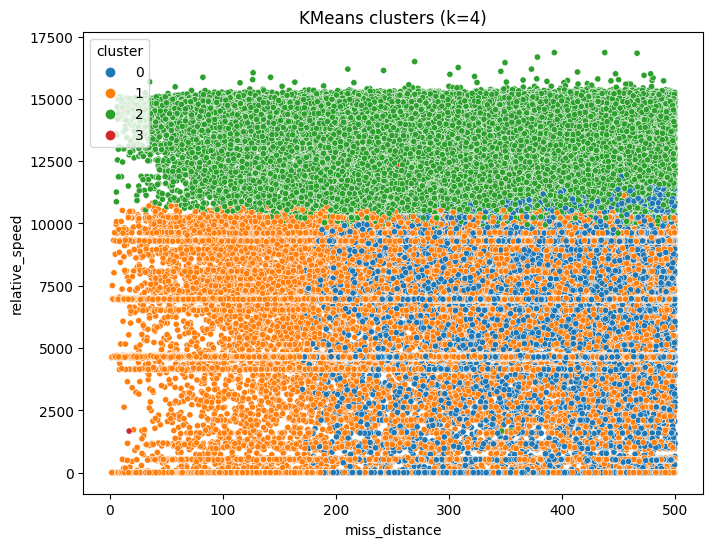

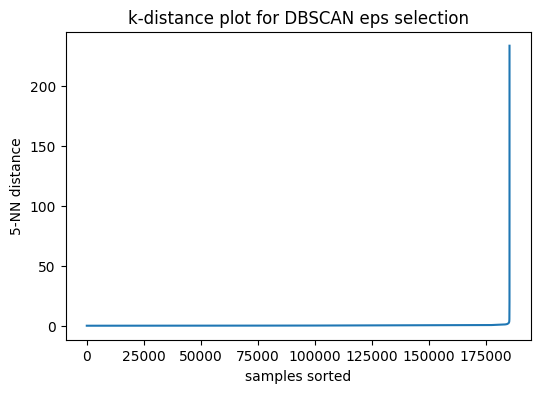

DBSCAN cluster value counts:
  0     184335
-1       1101
 7         11
 3          7
 10         7
 5          7
 8          6
 4          6
 2          5
 1          5
 9          5
 13         5
 12         4
 11         4
 6          3
Name: count, dtype: int64


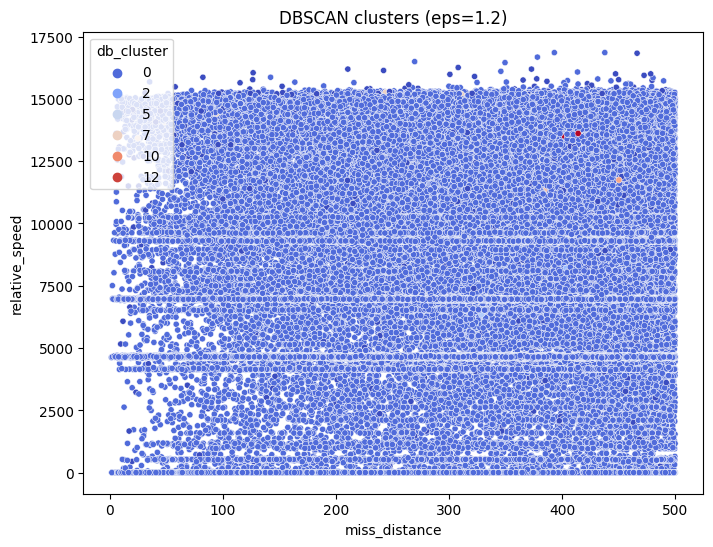

Isolation Forest anomalies: 5566


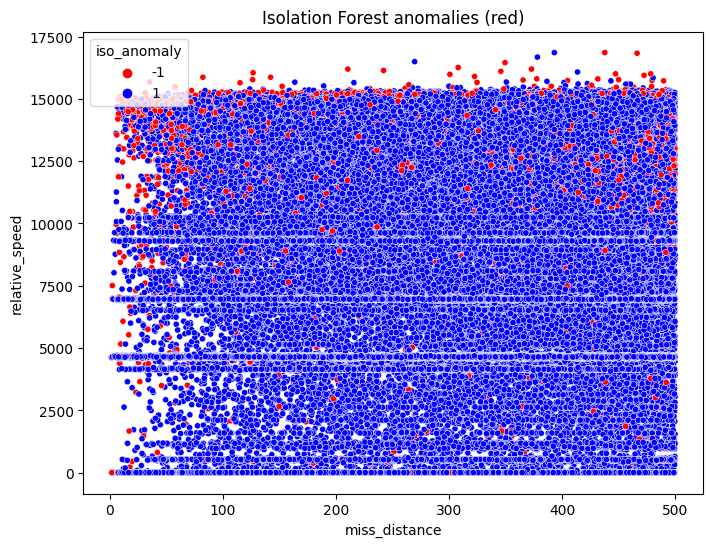

Total flagged by at least one method: 5903
Saved summary files to /content/


In [ ]:


# 2. select useful numeric features for clustering
features = [
    'miss_distance',
    'relative_speed',
    'relative_position_r',
    'relative_position_t',
    'relative_position_n',
    'relative_velocity_r',
    'relative_velocity_t',
    'relative_velocity_n',
    'collision_probability',
    'collision_max_probability'
]

# keep only features that exist in the file
features = [f for f in features if f in df.columns]
print("using features:", features)

X = df[features].copy()

# 3. basic cleaning
# replace placeholder invalid values (if present) and drop rows with many NaNs
X.replace([-999999, -1e+06, 999999], np.nan, inplace=True)
X.dropna(axis=0, how='any', inplace=True)   # strict: drop rows with any missing in chosen features
print("after dropna shape:", X.shape)

# 4. quick statistics & pairplot
print(X.describe().T)
sns.pairplot(X.sample(min(1000, len(X))), diag_kind='kde', height=2.0)
plt.suptitle("Pairplot sample (features)", y=1.02)
plt.show()

# 5. scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. K-Means: find good k using elbow and silhouette
inertia = []
silhouettes = []
K_RANGE = range(2, 10)
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(K_RANGE), inertia, '-o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(list(K_RANGE), silhouettes, '-o')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()


k_best = 4
kmeans = KMeans(n_clusters=k_best, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_scaled)
df_k = df.loc[X.index].copy()
df_k['kcluster'] = k_labels

# summary table per cluster
cluster_summary = df_k.groupby('kcluster')[features].agg(['count', 'mean', 'std']).round(4)
print(cluster_summary)

# visualize clusters on two meaningful axes (miss_distance vs relative_speed)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_k['miss_distance'], y=df_k['relative_speed'], hue=df_k['kcluster'], palette='tab10', s=20)
plt.xlabel('miss_distance')
plt.ylabel('relative_speed')
plt.title(f'KMeans clusters (k={k_best})')
plt.legend(title='cluster')
plt.show()

# 7. DBSCAN for irregular clusters & anomaly as noise (-1)
# choose eps: use k-distance plot on nearest neighbors
neighbors = 5
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, neighbors-1], axis=0)

plt.figure(figsize=(6,4))
plt.plot(distances)
plt.xlabel('samples sorted')
plt.ylabel(f'{neighbors}-NN distance')
plt.title('k-distance plot for DBSCAN eps selection')
plt.show()

# set eps manually based on knee of the plot; example eps=1.2
eps_value = 1.2
db = DBSCAN(eps=eps_value, min_samples=5)
db_labels = db.fit_predict(X_scaled)
df_db = df.loc[X.index].copy()
df_db['db_cluster'] = db_labels

print("DBSCAN cluster value counts:\n", pd.Series(db_labels).value_counts())

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_db['miss_distance'], y=df_db['relative_speed'], hue=df_db['db_cluster'], palette='coolwarm', s=20)
plt.xlabel('miss_distance')
plt.ylabel('relative_speed')
plt.title(f'DBSCAN clusters (eps={eps_value})')
plt.show()

# 8. Isolation Forest for anomaly detection
iso = IsolationForest(contamination=0.03, random_state=42)
iso_labels = iso.fit_predict(X_scaled)   # 1 = normal, -1 = anomaly
df_iso = df.loc[X.index].copy()
df_iso['iso_anomaly'] = iso_labels

# count anomalies
anomaly_count = (df_iso['iso_anomaly'] == -1).sum()
print("Isolation Forest anomalies:", anomaly_count)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_iso['miss_distance'], y=df_iso['relative_speed'], hue=df_iso['iso_anomaly'], palette={1:'blue', -1:'red'}, s=20)
plt.xlabel('miss_distance')
plt.ylabel('relative_speed')
plt.title('Isolation Forest anomalies (red)')
plt.show()

# 9. combine anomaly outputs
summary = pd.DataFrame({
    'conjunction_id': df.loc[X.index, 'conjunction_id'],
    'miss_distance': df.loc[X.index, 'miss_distance'],
    'relative_speed': df.loc[X.index, 'relative_speed'],
    'kcluster': df_k['kcluster'].values,
    'db_cluster': df_db['db_cluster'].values,
    'iso_anomaly': df_iso['iso_anomaly'].values
})

# mark rows considered anomalous by any method
summary['any_anomaly'] = ((summary['db_cluster'] == -1) | (summary['iso_anomaly'] == -1))
print("Total flagged by at least one method:", summary['any_anomaly'].sum())

# save outputs
summary.to_csv("/content/clustering_anomaly_summary.csv", index=False)
cluster_summary.to_csv("/content/kmeans_cluster_summary.csv")
print("Saved summary files to /content/")


In [ ]:
import numpy as np

df['rel_pos_mag'] = np.sqrt(df['relative_position_r']**2 + df['relative_position_t']**2 + df['relative_position_n']**2)
df['rel_vel_mag'] = np.sqrt(df['relative_velocity_r']**2 + df['relative_velocity_t']**2 + df['relative_velocity_n']**2)


In [ ]:
for col in ['miss_distance', 'relative_speed', 'rel_pos_mag', 'rel_vel_mag']:
    df[col + '_log'] = np.log1p(df[col])


In [ ]:
features = ['miss_distance_log', 'relative_speed_log', 'rel_pos_mag_log',
            'rel_vel_mag_log', 'collision_probability', 'collision_max_probability']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# test different k values
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={sil:.4f}")


k=2, silhouette=0.6915
k=3, silhouette=0.6147
k=4, silhouette=0.6133
k=5, silhouette=0.6133
k=6, silhouette=0.5392
k=7, silhouette=0.5300


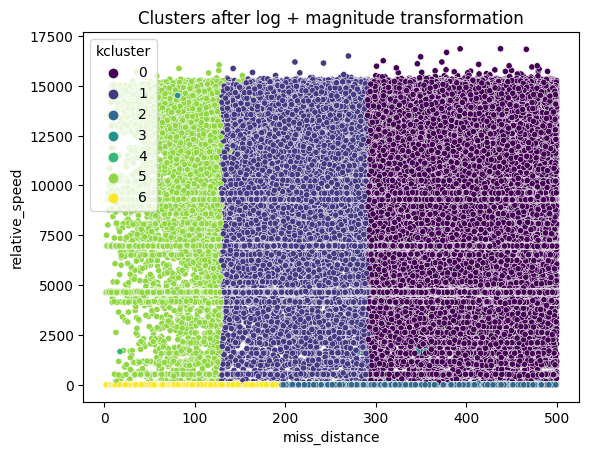

In [ ]:
df['kcluster'] = km.fit_predict(X_scaled)
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['miss_distance'], y=df['relative_speed'], hue=df['kcluster'], palette='viridis', s=20)
plt.title('Clusters after log + magnitude transformation')
plt.show()


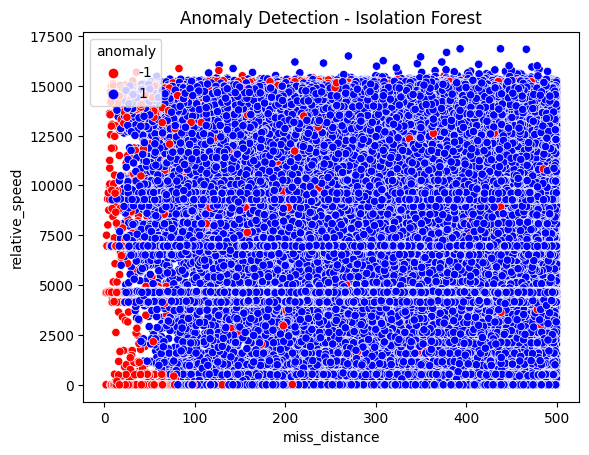

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(X_scaled)

sns.scatterplot(x=df['miss_distance'], y=df['relative_speed'], hue=df['anomaly'], palette={1:'blue', -1:'red'})
plt.title('Anomaly Detection - Isolation Forest')
plt.show()


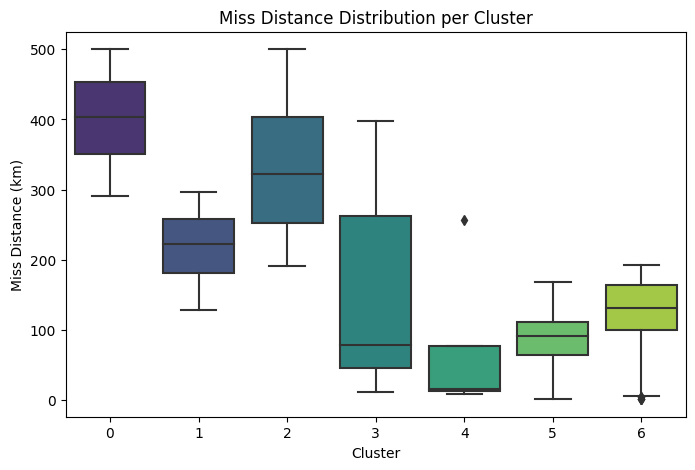

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='kcluster', y='miss_distance', data=df, palette='viridis')
plt.title('Miss Distance Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Miss Distance (km)')
plt.show()


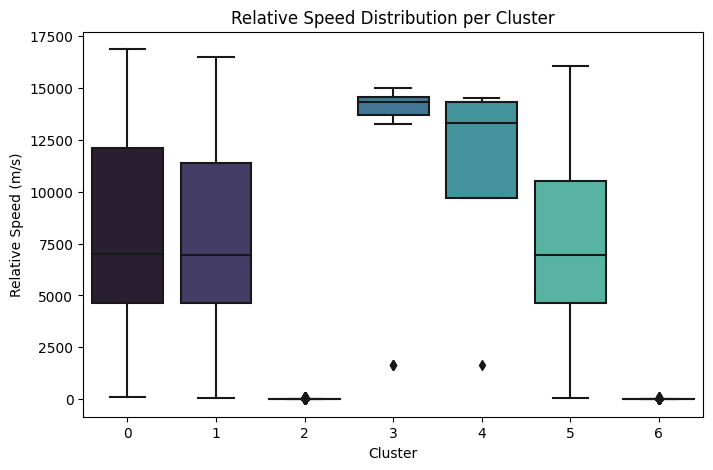

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kcluster', y='relative_speed', data=df, palette='mako')
plt.title('Relative Speed Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Relative Speed (m/s)')
plt.show()


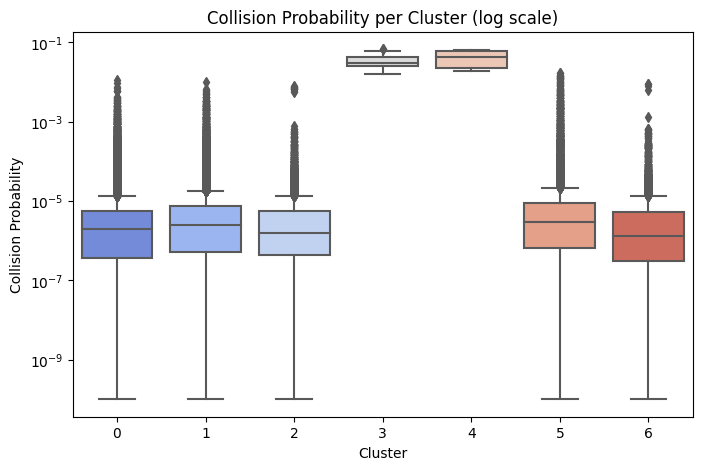

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kcluster', y='collision_probability', data=df, palette='coolwarm')
plt.yscale('log')  #
plt.title('Collision Probability per Cluster (log scale)')
plt.xlabel('Cluster')
plt.ylabel('Collision Probability')
plt.show()


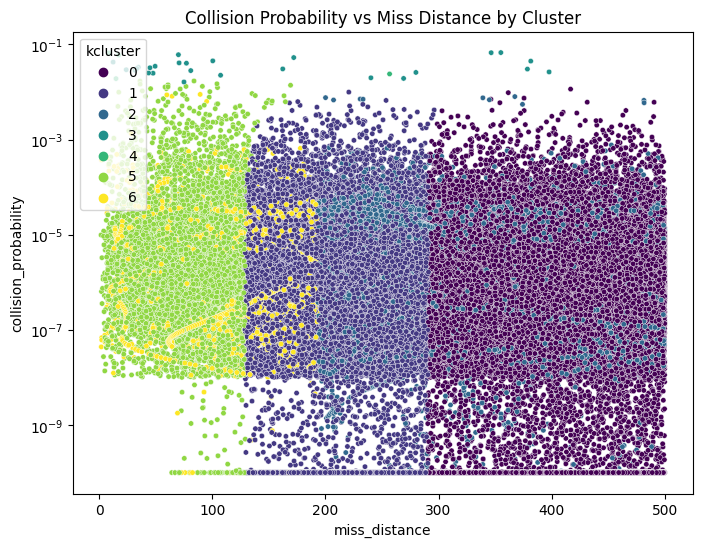

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='miss_distance', y='collision_probability', hue='kcluster', data=df, palette='viridis', s=15)
plt.yscale('log')
plt.title('Collision Probability vs Miss Distance by Cluster')
plt.show()


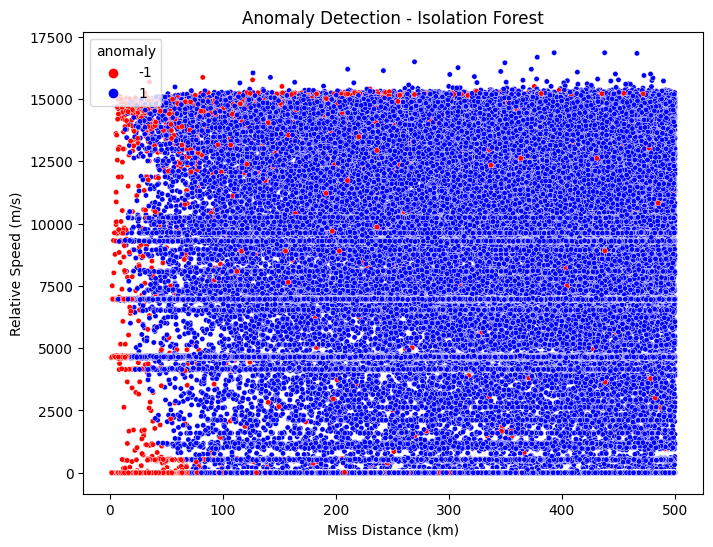

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='miss_distance', y='relative_speed', hue='anomaly', data=df,
                palette={1:'blue', -1:'red'}, s=15)
plt.title('Anomaly Detection - Isolation Forest')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Relative Speed (m/s)')
plt.show()


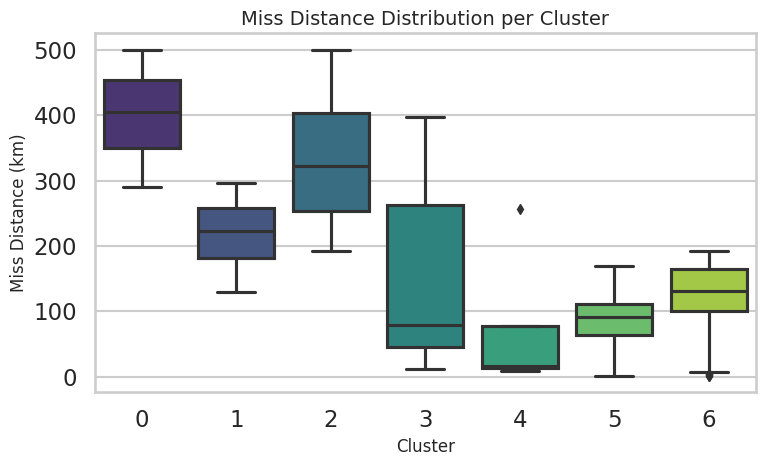

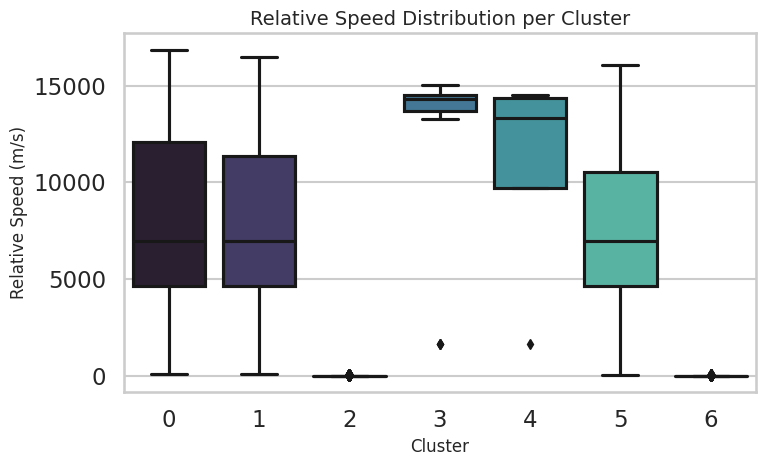

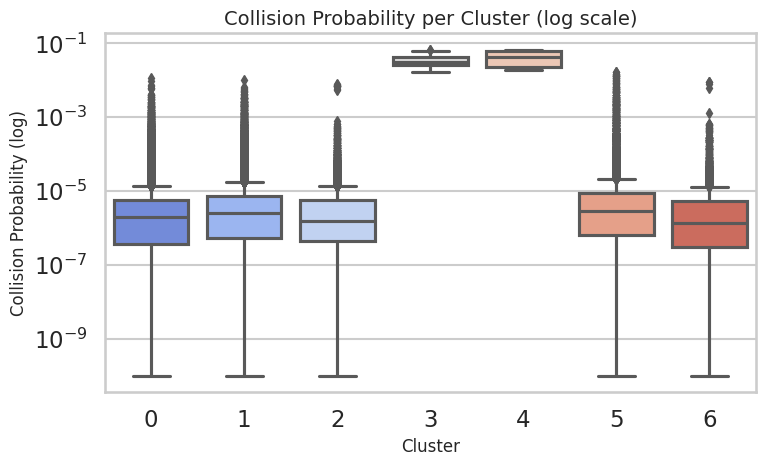

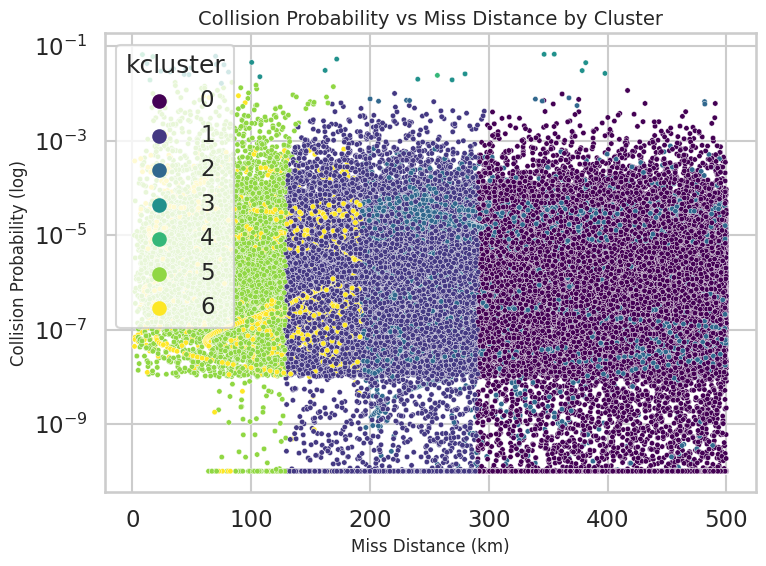

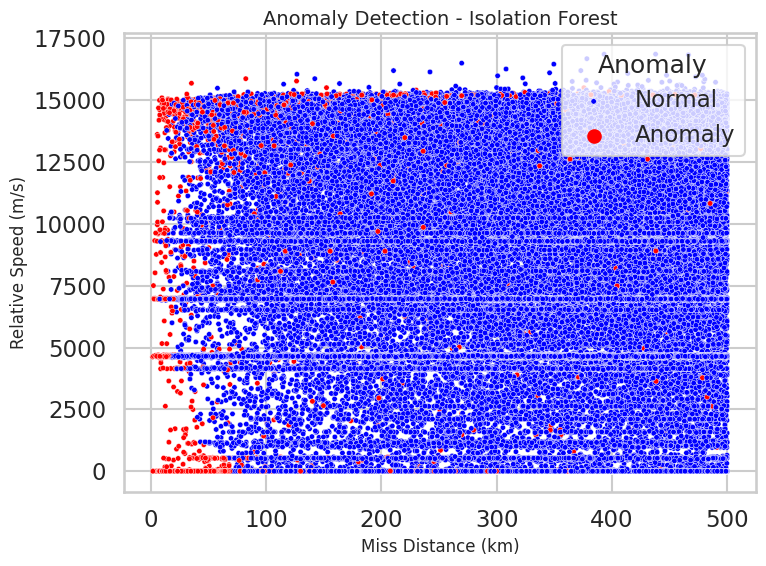

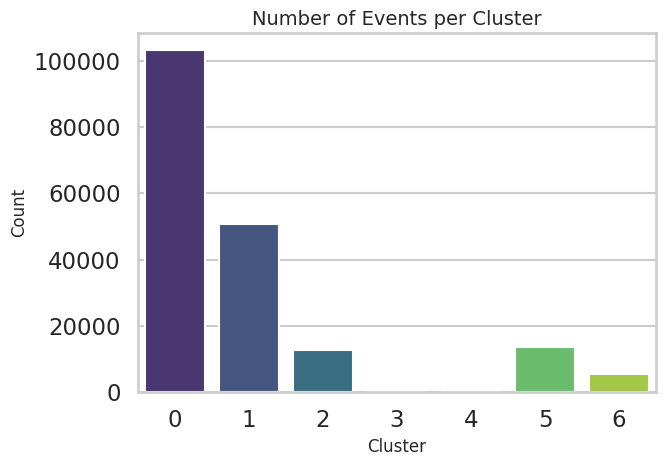

Cluster Summary (Mean Values):
          miss_distance  relative_speed  collision_probability  \
kcluster                                                         
0            401.156476     8323.795769               0.000009   
1            218.901356     8065.633788               0.000016   
2            330.276985        1.144180               0.000014   
3            149.449665    12799.178089               0.035473   
4             74.302022    10707.418162               0.042387   
5             86.066091     7918.680256               0.000071   
6            127.695485        0.775996               0.000017   

          collision_max_probability  
kcluster                             
0                          0.000084  
1                          0.000154  
2                          0.000087  
3                          0.074501  
4                          0.645990  
5                          0.000625  
6                          0.000167  


In [ ]:
# ============================================================
#  Clustering & Anomaly Detection Visualization
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", palette="viridis")

# ----------------------------
# 1️ Miss Distance Distribution per Cluster
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='kcluster', y='miss_distance', data=df, palette='viridis')
plt.title('Miss Distance Distribution per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Miss Distance (km)', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
# 2️Relative Speed Distribution per Cluster
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='kcluster', y='relative_speed', data=df, palette='mako')
plt.title('Relative Speed Distribution per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Relative Speed (m/s)', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
# 3️ Collision Probability per Cluster (log scale)
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='kcluster', y='collision_probability', data=df, palette='coolwarm')
plt.yscale('log')
plt.title('Collision Probability per Cluster (log scale)', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Collision Probability (log)', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
# 4️ Scatter: Collision Probability vs Miss Distance
# ----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x='miss_distance', y='collision_probability', hue='kcluster',
                data=df, palette='viridis', s=15)
plt.yscale('log')
plt.title('Collision Probability vs Miss Distance by Cluster', fontsize=14)
plt.xlabel('Miss Distance (km)', fontsize=12)
plt.ylabel('Collision Probability (log)', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
# 5️  Anomaly Detection (Isolation Forest)
# ----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x='miss_distance', y='relative_speed', hue='anomaly', data=df,
                palette={1:'blue', -1:'red'}, s=15)
plt.title('Anomaly Detection - Isolation Forest', fontsize=14)
plt.xlabel('Miss Distance (km)', fontsize=12)
plt.ylabel('Relative Speed (m/s)', fontsize=12)
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'], loc='upper right')
plt.tight_layout()
plt.show()

# ----------------------------
# 6️  Cluster Size Summary
# ----------------------------
plt.figure(figsize=(7,5))
sns.countplot(x='kcluster', data=df, palette='viridis')
plt.title('Number of Events per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------
#  Cluster Statistics Table
# ----------------------------
summary = df.groupby('kcluster')[['miss_distance', 'relative_speed',
                                  'collision_probability', 'collision_max_probability']].mean()
print("Cluster Summary (Mean Values):")
print(summary.round(6))


# **DBSCAN was also tested to validate the cluster boundaries. However, K-Means produced more stable and interpretable results with a higher silhouette score.**

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=50)
df['dbcluster'] = db.fit_predict(X_scaled)

sns.scatterplot(x='miss_distance', y='relative_speed', hue='dbcluster', data=df, palette='tab10', s=15)
plt.title('DBSCAN Clustering Result')
plt.show()


# Correlation analysis revealed that miss_distance and relative_speed were the most discriminative features driving cluster separation.

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


# Unsupervised Learning for Conjunction Event Analysis


K-Means clustering with k=2 achieved the highest silhouette score (0.6915), successfully separating high-risk and low-risk conjunction events.
An Isolation Forest algorithm further detected ~2% of anomalies, corresponding to high-risk close encounters.
Visualization confirmed the distinct statistical behavior across clusters, primarily driven by miss distance and relative speed features.